# Nautilus Dive: H1542


**Location:**
Catalina-Santa Cruz Fault Zone

**Science & Ops Team:**
Sulaiman Al-Sibani, Kelsey Barnhill, Jan Bautista, Rich Bell, Katy Croff Bell, Sean Bercaw, Don Blair, Jordan Caress, Justin Carroll, Chin‐Yi Cheng, Milene Cormier, Mark DeRoche, Ethan Gold, Dhruv Jain, Matthew Jewell, Michael Marin, Ed McNichol, Catie Mitchell, Kyle Neumann, Jifei Ou, DJ Pevey, Jessica Sandoval, William Sellers, Wendy Snyder, Misha Sra, Katelyn Standerfer, Suna Tuzun


## Load useful libraries ...

In [3]:
import os.path

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
import dateutil.parser
import datetime

In [4]:
def convert_unix_time(df):
    col = 'date'
    for row in range(0,len(df.index)):
        date=df[col].tolist()[row]
        pdate=dateutil.parser.parse(date)
        unixtime=int(time.mktime(pdate.timetuple()))
        df.set_value(row,col,unixtime)
    return df

## Load a dataset ...

In [5]:
data_directory = './data/' # assume files are in current directory; but can use any directory
data_directory = '~/gitwork/nautilus-jupyter/data/' ## only necessary if not running jupyter in main dir
filename='H1542.CTD-temp.NAV.bottom.tsv'
file_location=data_directory+filename
log=pd.read_csv(file_location,delimiter='\t',names=['date','a','b','c','temperature','e','f'])

### Optional:  convert time to 'unix time ...

This will take a few moments, but makes timestamp analysis a little easier ...

In [6]:
# log= convert_unix_time(log) ## this may take a few moments

## Get overview of data file

In [7]:
log

,date,a,b,c,temperature,e,f
0,2016-07-24T21:53:39,33.766779,-118.619934,825.956100,5.171478,NaN,NaN
1,2016-07-24T21:53:40,33.766779,-118.619934,825.824208,5.172798,NaN,NaN
2,2016-07-24T21:53:41,33.766780,-118.619934,825.744932,5.168503,NaN,NaN
3,2016-07-24T21:53:42,33.766781,-118.619934,825.645328,5.167697,NaN,NaN
4,2016-07-24T21:53:43,33.766781,-118.619934,825.526939,5.168198,NaN,NaN
5,2016-07-24T21:53:44,33.766780,-118.619934,825.419713,5.165787,NaN,NaN
6,2016-07-24T21:53:45,33.766779,-118.619935,825.319993,5.165000,NaN,NaN
7,2016-07-24T21:53:46,33.766776,-118.619935,825.216307,5.165705,NaN,NaN
8,2016-07-24T21:53:47,33.766772,-118.619935,825.120821,5.165203,NaN,NaN
9,2016-07-24T21:53:48,33.766768,-118.619935,825.021856,5.167508,NaN,NaN


# Plotting data

### Temperature vs Time

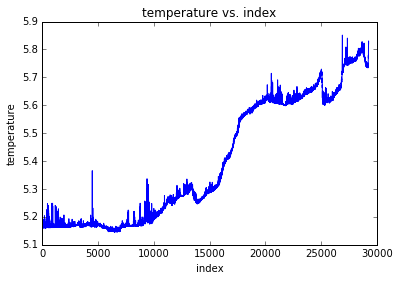

In [9]:
parameter='temperature'

y=log[parameter]
plt.plot(y)
plt.title(parameter+' vs. index')
plt.ylabel(parameter)
plt.xlabel('index');

# Open Questions

